# EBay Price Monitoring Analysis: Laptops

**By Samuel Oyedele**


## Table of Contents
<ul>
    <li> <a href="#intro">Introduction</a> </li>
    <li> <a href="#wrangling">Data Wrangling</a> </li>
    <li> <a href="#eda">Exploratory Data Analysis</a> </li>
    <li> <a href="#conclusions">Conclusions</a> </li>
</ul>

<a id="intro"></a>
## Introduction
> This project scraped data from the eBay website about the laptop prices from three of the most popular brands: Apple, Dell and HP.

### Objective
> To monitor and analyze the prices of laptop products from three brands (Apple, Dell and HP) on **Ebay website**

### Tool Used
> Python, Pandas (data manipulation), BeautiSoup(Web scraping), Matplotlib / Seaborn (data visualization)

### Skills Highlighted
> Web scraping, data cleaning, data analysis, data visualization

### Website Page Links

[Apple Laptops](https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&_ipg=120&rt=nc&Brand=Apple&_oaa=1&_dcat=177)

[Dell laptops](https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&_ipg=120&rt=nc&Brand=Dell&_oaa=1&_dcat=177)

[HP Laptops](https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&_ipg=120&rt=nc&Brand=HP&_oaa=1&_dcat=177)

<a id="wrangling"></a>
## Data Wrangling

> In this section, the datasets will be gathered (web scraping), assessed for quality and tidiness issues and cleaned for analysis and visualization.

### Gathering Data
> In this section, web scraping is performed using BeautifulSoup to scrape the data from Ebay websites for data collection.

In [34]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as re
from bs4 import BeautifulSoup
from datetime import datetime
import time

#### Web Scraping
> In this section, the data are collected through scraping of data from the website using Request and BeautifulSoup.

In [2]:
# website urls
apple_url = "https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&_ipg=120&rt=nc&Brand=Apple&_oaa=1&_dcat=177"

dell_url = "https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&_ipg=120&rt=nc&Brand=Dell&_oaa=1&_dcat=177"

hp_url = "https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&_ipg=120&rt=nc&Brand=HP&_oaa=1&_dcat=177"

In [3]:
# Set the maximum column width to 500 characters
pd.set_option('display.max_colwidth', 1000) 

**Scraping Apple Laptops**

In [32]:
# Create a function
def scrape_apple_laptops(apple_url):
    # List to hold the data
    data =[]
    # Loop through 9 pages
    for page in range(1,10):
        # Construct the URL for the current page
        pages = f'{apple_url}&_pgn={page}'
        
        # Send a request to the website
        page = re.get(pages)
        
        # Check if the request was successful
        if page.status_code == 200:
            
            # Parse the HTML content
            soup = BeautifulSoup(page.content, "html.parser")
            
            # Find all the elements containing the products data
            products = soup.find_all('li', class_="s-item s-item__pl-on-bottom")
    
            # Loop through each product to extract data
            for product in products:
                model = product.find('div', class_="s-item__title").span.text.strip()
                # filter the product title for "Macbook"
                if ("Macbook" in model or "MacBook" in model or "Screen" not in model or "iPhone" not in model) and "GB" in model:
                    price = product.find('span', class_="s-item__price").text.strip()
                    shipping_cost = product.find('span', class_="s-item__shipping s-item__logisticsCost")
                    if shipping_cost != None:
                        shipping_cost = product.find('span', class_="s-item__shipping s-item__logisticsCost").text.strip()
                        timestamp = datetime.now()
                        
                        # Append the product data to the list
                        data.append([model, price, shipping_cost, timestamp])
                        
        else:
            print(f'Failed to retrieve {apple_url}')

    # Create column name for the product data
    columns = ["model", "price", "shipping_cost", "timestamp"]
    
    # Create a DataFrame from the data
    apple_df = pd.DataFrame(data, columns=columns)
    
    # Save the DataFrame to csv file
    apple_df.to_csv("Ebay_Apple_Laptops_price.csv", index=False)
    
    return apple_df

In [3]:
# To create an automate script for the code above:

'''
def job():
    apple_url = 'https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&_ipg=120&rt=nc&Brand=Apple&_oaa=1&_dcat=177'
    scrape_apple_laptops(apple_url)
    print('Scraping completed and data saved.')

# Schedule the job every 2 days
schedule.every(2).days.do(job)

while True:
    schedule.run_pending()
    time.sleep(1)
'''

"\ndef job():\n    apple_url = 'https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptop&_sacat=0&_ipg=120&rt=nc&Brand=Apple&_oaa=1&_dcat=177'\n    scrape_apple_laptops(apple_url)\n    print('Scraping completed and data saved.')\n\n# Schedule the job every 2 days\nschedule.every(2).days.do(job)\n\nwhile True:\n    schedule.run_pending()\n    time.sleep(1)\n"

In [13]:
scrape_apple_laptops(apple_url)

,model,price,shipping_cost,timestamp
0,"New ListingREAD! 2019 Apple MacBook Pro 16"" i7 2.6GHz 16GB 512GB SSD A2141 FIND MY ENABLED",$275.00,Free shipping,2024-07-24 10:59:43.277459
1,Apple MacBook Pro 13'' MF839LL/A A1502 CORE I5-5257U 2.70GHz 8GB RAM 256GB SSD,$62.00,Free shipping,2024-07-24 10:59:43.290218
2,Apple MacBook Air 13 Intel Core i7-5650U 2.20GHz 8GB RAM 256GB SSD Z0UU1LL/A,$34.00,Free shipping,2024-07-24 10:59:43.291976
3,Apple MacBook Pro 13 Intel Core i5-7360U 2.30GHz 16GB RAM 256GB SSD MPXQ2LL/A,$61.00,Free shipping,2024-07-24 10:59:43.295445
4,Apple MacBook Pro 13 Intel Core i7-1068NG7 2.30GHz 16GB RAM 1TB MWP72LL/A A2251,$199.50,Free shipping,2024-07-24 10:59:43.297215
5,Apple MacBook Pro 15 Intel Core i9-9880H 2.30GHz 16GB RAM 512GB SSD A1990,$202.50,Free shipping,2024-07-24 10:59:43.301482
6,"Apple MacBook Air 13"" Core i5 1.7GHz 4GB Ram 64GB SSD -C Grade - See Description",$76.13,Free shipping,2024-07-24 10:59:43.303270
7,"Apple MacBook Pro A1278 8,1 13.3"" 2.4GHz i5 8GB RAM 500GB HDD 10.13 Grade A NoAC",$64.79,+$17.70 shipping,2024-07-24 10:59:43.305352
8,New ListingApple MacBook Air 13 Intel Core i5-8210Y 1.60GHz 16GB RAM 256GB SSD MVFH2LL/A,$5.50,Free shipping,2024-07-24 10:59:43.307752
9,"Apple MacBook Air - 13"" Retina (TRUE TONE) - 1.6GHz - 8GB RAM - 256GB SSD",$337.99,Free shipping,2024-07-24 10:59:43.309537


**Scraping Dell Laptops**

In [34]:
# Create a function
def scrape_dell_laptops(dell_url):
    # List to hold the data
    data =[]
    # Loop through 9 pages
    for page in range(1,10):
        # Construct the URL for the current page
        pages = f'{dell_url}&_pgn={page}'
        
        # Send a request to the website
        page = re.get(pages)
        
        # Check if the request was successful
        if page.status_code == 200:
            
            # Parse the HTML content
            soup = BeautifulSoup(page.content, "html.parser")
            
            # Find all the elements containing the products data
            products = soup.find_all('li', class_="s-item s-item__pl-on-bottom")
    
            # Loop through each product to extract data
            for product in products:
                model = product.find('div', class_="s-item__title").span.text.strip()
                # filter the product title for "Dell"
                if ("Dell" in model or "Laptop" in model) and "HP" not in model:
                    price = product.find('span', class_="s-item__price").text.strip()
                    if "to" not in price:
                        shipping_cost = product.find('span', class_="s-item__shipping s-item__logisticsCost")
                        if shipping_cost != None:
                            shipping_cost = product.find('span', class_="s-item__shipping s-item__logisticsCost").text.strip()
                            timestamp = datetime.now()
                        
                            # Append the product data to the list
                            data.append([model, price, shipping_cost, timestamp])

# Create column name for the product data
    columns = ["model", "price", "shipping_cost", "timestamp"]
    
    # Create a DataFrame from the data
    dell_df = pd.DataFrame(data, columns=columns)
    
    # Save the DataFrame to csv file
    dell_df.to_csv("Ebay_Dell_Laptops_price.csv",index=False) 
    
    return dell_df
                        

In [35]:
scrape_dell_laptops(dell_url)

,model,price,shipping_cost,timestamp
0,Dell Latitude Rugged 7214 Touch Extreme i5-6300U 16GB 256GB Win 10 Pro Grade B,$197.10,Free shipping,2024-07-24 11:12:06.929406
1,Dell Inspiron 15 Touch Screen Laptop Intel Core i5 8GB 512GB SSD - Carb...,$629.99,Free shipping,2024-07-24 11:12:06.937800
2,Dell XPS 13 13.4FHD+ Laptop Intel Core Ultra 7 Evo Edition - 16GB ...,"$1,399.99",Free shipping,2024-07-24 11:12:06.943428
3,New ListingLot of 2 Dell Latitude 5490 i5-8350u@1.70GHz 8GB RAM 256GB SSD No HDD/OS CM680*,$149.99,+$14.65 shipping,2024-07-24 11:12:06.947561
4,Dell Latitude 3189 - 2-IN-1 Tablet Intel pentium N4200 8GB RAM 128GB SSD *****,$49.00,Free shipping,2024-07-24 11:12:06.951000
5,Lot of 23 Dell E6430/20 ATG i5 2.5- 2.6 2.7GHz 4-8GB 256-512 SSD 10P see details,"$1,200.00",Free shipping,2024-07-24 11:12:06.956041
6,Dell Latitude Rugged 5414 i5 6300U 2.4GHz 16GB RAM 500GB SSD Win10 ORANGE,$355.55,+$18.99 shipping,2024-07-24 11:12:06.957635
7,New ListingDell Laptop Windows 11 Latitude 5480 Intel Core i7-7th Gen SSD HD 8GB Webcam,$20.50,+$15.00 shipping,2024-07-24 11:12:06.959566
8,Dell Inspiron 142-in-1 Touch Laptop Intel Core 7 Processor 16GB Memor...,$999.99,Free shipping,2024-07-24 11:12:06.970859
9,Defective Dell Inspiron 14 5401 2 in 1 Laptop i5-1135G7 4GB 0HD No PSU AS-IS,$136.30,+$21.57 shipping,2024-07-24 11:12:06.987952


**Scraping HP Laptops**

In [10]:
def scrape_hp_laptops(hp_url):
    # List to hold the data
    data =[]
    # Loop through 9 pages
    for page in range(1,10):
        # Construct the URL for the current page
        pages = f'{hp_url}&_pgn={page}'
        
        # Send a request to the website
        page = re.get(pages)
        
        # Check if the request was successful
        if page.status_code == 200:
            
            # Parse the HTML content
            soup = BeautifulSoup(page.content, "html.parser")
            
            # Find all the elements containing the products data
            products = soup.find_all('li', class_="s-item s-item__pl-on-bottom")
    
            # Loop through each product to extract data
            for product in products:
                model = product.find('div', class_="s-item__title").span.text.strip()
                # filter the product title for "HP"
                if "HP" in model:
                    price = product.find('span', class_="s-item__price").text.strip()
                    if "$" in price and "to" not in price:
                        shipping_cost = product.find('span', class_="s-item__shipping s-item__logisticsCost")
                        if shipping_cost != None:
                            shipping_cost = product.find('span', class_="s-item__shipping s-item__logisticsCost").text.strip()
                            timestamp = datetime.now()
                        
                            # Append the product data to the list
                            data.append([model, price, shipping_cost, timestamp])

    # Create column name for the product data
    columns = ["model", "price", "shipping_cost", "timestamp"]
    
    # Create a DataFrame from the data
    hp_df = pd.DataFrame(data, columns=columns)
    
    # Save the DataFrame to csv file
    hp_df.to_csv("Ebay_HP_Laptops_price.csv",index=False) 
    
    
    return hp_df
                        

In [11]:
scrape_hp_laptops(hp_url)

,model,price,shipping_cost,timestamp
0,FAST HP Laptop Intel Core i7 2.8GHz 16GB 512GB SSD Wi-Fi Fingerprint BT Cam W11P,$199.00,Free shipping,2024-07-24 10:56:53.853563
1,"HP - 14"" Laptop - Intel Celeron - 4GB Memory - 64GB eMMC - Snowflake White",$179.99,Free shipping,2024-07-24 10:56:53.869422
2,"HP ProBook x360 11 G1 11.6"" TouchScreen Notebook PC 4GB 128GB SSD Windows 10 Pro",$70.20,Free shipping,2024-07-24 10:56:53.871268
3,"New ListingHP 15-dy5033dx Laptop 15.6"" 256GB i3-1215U 1.1GHz 8GB Windows 11 Home In S Mode",$173.99,Free shipping,2024-07-24 10:56:53.877519
4,"HP Chromebook 14 G5 Intel Celeron N3450 @ 1.10GHz, 8GB Ram, 32GB EMMc",$59.99,Free shipping,2024-07-24 10:56:53.881273
5,HP ENVY x360 Touchscreen 15.6'' Laptop + MS OFFICE Intel i5-7200U 8GB 256GB SSD,$324.99,+$14.99 shipping,2024-07-24 10:56:53.883105
6,"HP - 14"" Laptop - Intel Celeron - 4GB Memory - 128GB eMMC - Rose Gold",$199.99,Free shipping,2024-07-24 10:56:53.884935
7,"HP - Envy 16"" Wide Ultra XGA Touch-Screen Laptop - Intel Core i7 - 16GB Memor...","$1,499.99",Free shipping,2024-07-24 10:56:53.886519
8,"2023 HP 17-cn3053cl 17.3"" IPS FHD Laptop Intel Core i5-1335U 12GB 512GB SSD W11",$349.00,Free shipping,2024-07-24 10:56:53.888628
9,"HP 14 G4 Chromebook, 16GB SSD, 4GB RAM, WiFi, , 14inch screen FREE SHIPPING",$50.09,Free shipping,2024-07-24 10:56:53.890799


### Assessing Data
> In this section, the scraped data will be assessed for quality and tidiness issues.

#### Read the CSV Files

In [4]:
# apple laptops
apple_df = pd.read_csv("Ebay_Apple_Laptops_price.csv")

# dell laptops
dell_df = pd.read_csv("Ebay_Dell_Laptops_price.csv")

# hp laptops
hp_df = pd.read_csv("Ebay_HP_Laptops_price.csv")

#### Add a brand column to each dataframe

In [5]:
apple_df['brand'] = 'Apple'
dell_df['brand'] = 'Dell'
hp_df['brand'] = 'HP'

In [6]:
# preview the data
apple_df.head(5)

,model,price,shipping_cost,timestamp,brand
0,"New ListingREAD! 2019 Apple MacBook Pro 16"" i7 2.6GHz 16GB 512GB SSD A2141 FIND MY ENABLED",$275.00,Free shipping,2024-07-24 10:59:43.277459,Apple
1,Apple MacBook Pro 13'' MF839LL/A A1502 CORE I5-5257U 2.70GHz 8GB RAM 256GB SSD,$62.00,Free shipping,2024-07-24 10:59:43.290218,Apple
2,Apple MacBook Air 13 Intel Core i7-5650U 2.20GHz 8GB RAM 256GB SSD Z0UU1LL/A,$34.00,Free shipping,2024-07-24 10:59:43.291976,Apple
3,Apple MacBook Pro 13 Intel Core i5-7360U 2.30GHz 16GB RAM 256GB SSD MPXQ2LL/A,$61.00,Free shipping,2024-07-24 10:59:43.295445,Apple
4,Apple MacBook Pro 13 Intel Core i7-1068NG7 2.30GHz 16GB RAM 1TB MWP72LL/A A2251,$199.50,Free shipping,2024-07-24 10:59:43.297215,Apple


In [7]:
# preview the data
dell_df.head(5)

,model,price,shipping_cost,timestamp,brand
0,Dell Latitude Rugged 7214 Touch Extreme i5-6300U 16GB 256GB Win 10 Pro Grade B,$197.10,Free shipping,2024-07-24 11:12:06.929406,Dell
1,Dell Inspiron 15 Touch Screen Laptop Intel Core i5 8GB 512GB SSD - Carb...,$629.99,Free shipping,2024-07-24 11:12:06.937800,Dell
2,Dell XPS 13 13.4FHD+ Laptop Intel Core Ultra 7 Evo Edition - 16GB ...,"$1,399.99",Free shipping,2024-07-24 11:12:06.943428,Dell
3,New ListingLot of 2 Dell Latitude 5490 i5-8350u@1.70GHz 8GB RAM 256GB SSD No HDD/OS CM680*,$149.99,+$14.65 shipping,2024-07-24 11:12:06.947561,Dell
4,Dell Latitude 3189 - 2-IN-1 Tablet Intel pentium N4200 8GB RAM 128GB SSD *****,$49.00,Free shipping,2024-07-24 11:12:06.951000,Dell


In [8]:
# preview the data
hp_df.head(5)

,model,price,shipping_cost,timestamp,brand
0,FAST HP Laptop Intel Core i7 2.8GHz 16GB 512GB SSD Wi-Fi Fingerprint BT Cam W11P,$199.00,Free shipping,2024-07-24 10:56:53.853563,HP
1,"HP - 14"" Laptop - Intel Celeron - 4GB Memory - 64GB eMMC - Snowflake White",$179.99,Free shipping,2024-07-24 10:56:53.869422,HP
2,"HP ProBook x360 11 G1 11.6"" TouchScreen Notebook PC 4GB 128GB SSD Windows 10 Pro",$70.20,Free shipping,2024-07-24 10:56:53.871268,HP
3,"New ListingHP 15-dy5033dx Laptop 15.6"" 256GB i3-1215U 1.1GHz 8GB Windows 11 Home In S Mode",$173.99,Free shipping,2024-07-24 10:56:53.877519,HP
4,"HP Chromebook 14 G5 Intel Celeron N3450 @ 1.10GHz, 8GB Ram, 32GB EMMc",$59.99,Free shipping,2024-07-24 10:56:53.881273,HP


#### Combine the three datasets (Apple, Dell and HP)
> Using pandas `concat`

In [9]:
laptops_df = pd.concat([apple_df, dell_df, hp_df], ignore_index=True)
laptops_df

,model,price,shipping_cost,timestamp,brand
0,"New ListingREAD! 2019 Apple MacBook Pro 16"" i7 2.6GHz 16GB 512GB SSD A2141 FIND MY ENABLED",$275.00,Free shipping,2024-07-24 10:59:43.277459,Apple
1,Apple MacBook Pro 13'' MF839LL/A A1502 CORE I5-5257U 2.70GHz 8GB RAM 256GB SSD,$62.00,Free shipping,2024-07-24 10:59:43.290218,Apple
2,Apple MacBook Air 13 Intel Core i7-5650U 2.20GHz 8GB RAM 256GB SSD Z0UU1LL/A,$34.00,Free shipping,2024-07-24 10:59:43.291976,Apple
3,Apple MacBook Pro 13 Intel Core i5-7360U 2.30GHz 16GB RAM 256GB SSD MPXQ2LL/A,$61.00,Free shipping,2024-07-24 10:59:43.295445,Apple
4,Apple MacBook Pro 13 Intel Core i7-1068NG7 2.30GHz 16GB RAM 1TB MWP72LL/A A2251,$199.50,Free shipping,2024-07-24 10:59:43.297215,Apple
5,Apple MacBook Pro 15 Intel Core i9-9880H 2.30GHz 16GB RAM 512GB SSD A1990,$202.50,Free shipping,2024-07-24 10:59:43.301482,Apple
6,"Apple MacBook Air 13"" Core i5 1.7GHz 4GB Ram 64GB SSD -C Grade - See Description",$76.13,Free shipping,2024-07-24 10:59:43.303270,Apple
7,"Apple MacBook Pro A1278 8,1 13.3"" 2.4GHz i5 8GB RAM 500GB HDD 10.13 Grade A NoAC",$64.79,+$17.70 shipping,2024-07-24 10:59:43.305352,Apple
8,New ListingApple MacBook Air 13 Intel Core i5-8210Y 1.60GHz 16GB RAM 256GB SSD MVFH2LL/A,$5.50,Free shipping,2024-07-24 10:59:43.307752,Apple
9,"Apple MacBook Air - 13"" Retina (TRUE TONE) - 1.6GHz - 8GB RAM - 256GB SSD",$337.99,Free shipping,2024-07-24 10:59:43.309537,Apple


In [10]:
# preview of the data
laptops_df.head()

,model,price,shipping_cost,timestamp,brand
0,"New ListingREAD! 2019 Apple MacBook Pro 16"" i7 2.6GHz 16GB 512GB SSD A2141 FIND MY ENABLED",$275.00,Free shipping,2024-07-24 10:59:43.277459,Apple
1,Apple MacBook Pro 13'' MF839LL/A A1502 CORE I5-5257U 2.70GHz 8GB RAM 256GB SSD,$62.00,Free shipping,2024-07-24 10:59:43.290218,Apple
2,Apple MacBook Air 13 Intel Core i7-5650U 2.20GHz 8GB RAM 256GB SSD Z0UU1LL/A,$34.00,Free shipping,2024-07-24 10:59:43.291976,Apple
3,Apple MacBook Pro 13 Intel Core i5-7360U 2.30GHz 16GB RAM 256GB SSD MPXQ2LL/A,$61.00,Free shipping,2024-07-24 10:59:43.295445,Apple
4,Apple MacBook Pro 13 Intel Core i7-1068NG7 2.30GHz 16GB RAM 1TB MWP72LL/A A2251,$199.50,Free shipping,2024-07-24 10:59:43.297215,Apple


In [11]:
# dataset information
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 5 columns):
model            2224 non-null object
price            2224 non-null object
shipping_cost    2224 non-null object
timestamp        2224 non-null object
brand            2224 non-null object
dtypes: object(5)
memory usage: 87.0+ KB


In [12]:
# descriptive statistics
laptops_df.describe()

,model,price,shipping_cost,timestamp,brand
count,2224,2224,2224,2224,2224
unique,2001,720,333,2224,3
top,APPLE MACBOOK PRO A2251 2560X1600 CORE I5-1038NG7 500GB SSD 16GB RAM NO O.S,$100.00,Free shipping,2024-07-24 10:57:50.982591,HP
freq,54,40,1030,1,829


In [13]:
# check duplicates
laptops_df.duplicated().sum()

0

### Quality Issues

- Price Column: The datatype is in string instead of float and extracts the dollar($) from the price.
- Timestamp Column: Datatype issue


###  Data Cleaning
> In the section, the dataset will be cleaned for better analysis and visualizations.

####   Define
**Price Column**
> Using pandas `replace` to remove the currency sign($) and convert the datatype to `float` 

#### Code

In [14]:
# apple dataset
laptops_df['price'] = laptops_df['price'].replace('[\$,]', '', regex=True).astype(float)

#### Test

In [15]:
# return the first four prices
laptops_df['price'][:5]

0    275.0
1     62.0
2     34.0
3     61.0
4    199.5
Name: price, dtype: float64

####   Define
**Timestamp column**
> Convert the datatype to datetime

#### Code

In [16]:
laptops_df['timestamp'] = pd.to_datetime(laptops_df['timestamp'])

#### Test

In [17]:
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 5 columns):
model            2224 non-null object
price            2224 non-null float64
shipping_cost    2224 non-null object
timestamp        2224 non-null datetime64[ns]
brand            2224 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 87.0+ KB


In [18]:
# Save the cleaned combined dataframe
laptops_df.to_csv('Ebay_Cleaned_Laptops.csv', index=False)

<a id="eda"></a>
## Exploratory Data Analysis
> In this section, I will analyze the scrape cleaned data to identify the trends and pattern of prices for each brand of laptop products.

In [19]:
# Import the cleaned combined laptops dataframe
cleaned_laptops_df = pd.read_csv('Ebay_Cleaned_Laptops.csv')

In [20]:
# make a copy for analysis
cleaned_laptops_copy = cleaned_laptops_df.copy()
cleaned_laptops_copy.head()

,model,price,shipping_cost,timestamp,brand
0,"New ListingREAD! 2019 Apple MacBook Pro 16"" i7 2.6GHz 16GB 512GB SSD A2141 FIND MY ENABLED",275.0,Free shipping,2024-07-24 10:59:43.277459,Apple
1,Apple MacBook Pro 13'' MF839LL/A A1502 CORE I5-5257U 2.70GHz 8GB RAM 256GB SSD,62.0,Free shipping,2024-07-24 10:59:43.290218,Apple
2,Apple MacBook Air 13 Intel Core i7-5650U 2.20GHz 8GB RAM 256GB SSD Z0UU1LL/A,34.0,Free shipping,2024-07-24 10:59:43.291976,Apple
3,Apple MacBook Pro 13 Intel Core i5-7360U 2.30GHz 16GB RAM 256GB SSD MPXQ2LL/A,61.0,Free shipping,2024-07-24 10:59:43.295445,Apple
4,Apple MacBook Pro 13 Intel Core i7-1068NG7 2.30GHz 16GB RAM 1TB MWP72LL/A A2251,199.5,Free shipping,2024-07-24 10:59:43.297215,Apple


In [21]:
cleaned_laptops_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 5 columns):
model            2224 non-null object
price            2224 non-null float64
shipping_cost    2224 non-null object
timestamp        2224 non-null object
brand            2224 non-null object
dtypes: float64(1), object(4)
memory usage: 87.0+ KB


The new cleaned data (cleaned_laptops_copy) consist of 2224 rows and 5 columns for different laptop brands (Apple, Dell and HP)

### Price Distribution Analysis

Understand the distribution of laptop prices to identify common price ranges.

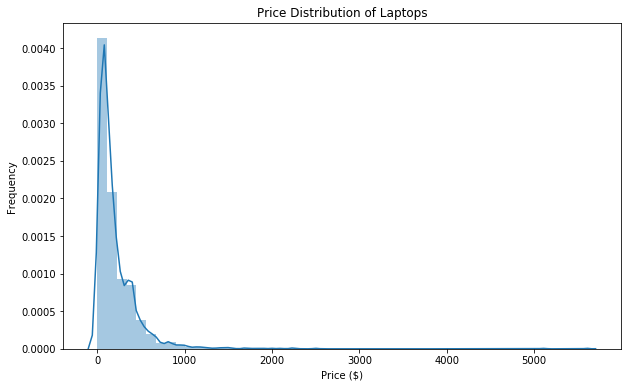

In [22]:
# Create a figure and histogram
plt.figure(figsize=(10, 6))
sns.distplot(cleaned_laptops_copy['price'], bins=50)

# Set title and labels
plt.title('Price Distribution of Laptops')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Save plo
plt.savefig('Price_distribution.png', bbox_inches = 'tight')

# Show plot
plt.show()

> From the distribution, most of laptops prices fall within the range of $0 - 1000

###  Average Price for Each Brand

Compare the average prices of laptops across different brands.

In [23]:
brand_avg_price = cleaned_laptops_copy.groupby('brand')['price'].mean().reset_index()
brand_avg_price

,brand,price
0,Apple,271.772763
1,Dell,218.394774
2,HP,153.539940


#### Visualization

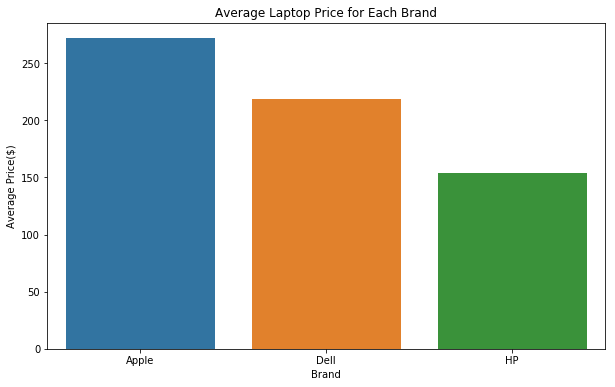

In [24]:
# Create a figure and barplot
plt.figure(figsize=(10,6))
sns.barplot(data=brand_avg_price, x='brand', y='price')

# Set title and labels
plt.title("Average Laptop Price for Each Brand")
plt.xlabel('Brand')
plt.ylabel('Average Price($)')

# Save plot
plt.savefig('average_price.png', bbox_inches = 'tight')

# Show plot
plt.show()

### Top 5 Highest Priced Laptops product for each Brand

Top 5 expensive prices of laptops across different brands.

#### Apple Brand

In [25]:
# Filter for Apple laptops
apple_laptops = cleaned_laptops_copy[cleaned_laptops_copy['brand'] == 'Apple']

# Sort by price to get the top 5 highest prices
apple_laptops = apple_laptops.sort_values(by='price', ascending=False).head(5)
apple_laptops

,model,price,shipping_cost,timestamp,brand
270,"APPLE MACBOOK PRO 16"" (512GB SSD, APPLE M3 PRO, 36GB RAM) LAPTOP - S (MVP022825)",2249.99,Free shipping,2024-07-24 11:00:08.413744,Apple
402,APPLE MACBOOK PRO A2780 3456X2234 M2 PRO 2.42GHz 1TB SSD 32GB RAM OS SONOMA,2231.55,Free shipping,2024-07-24 11:00:25.211739,Apple
493,"2023 Apple MacBook Pro 14"" M3 Pro 4.0GHz 18GB RAM 1TB SSD Midnight A2992",1699.99,Free shipping,2024-07-24 11:00:33.956805,Apple
663,Apple Macbook Pro 2023 A2780 16in M2 Pro 16GB RAM 512GB SSD Sonoma,1690.99,Free shipping,2024-07-24 11:00:50.648328,Apple
368,UPGRADED APPLE MacBook Pro 17'' Core i7 TURBO 3.5GHz 16GB 4TB SSD 3 YEAR WARNY,1550.99,Free shipping,2024-07-24 11:00:16.908483,Apple


#### Visualization

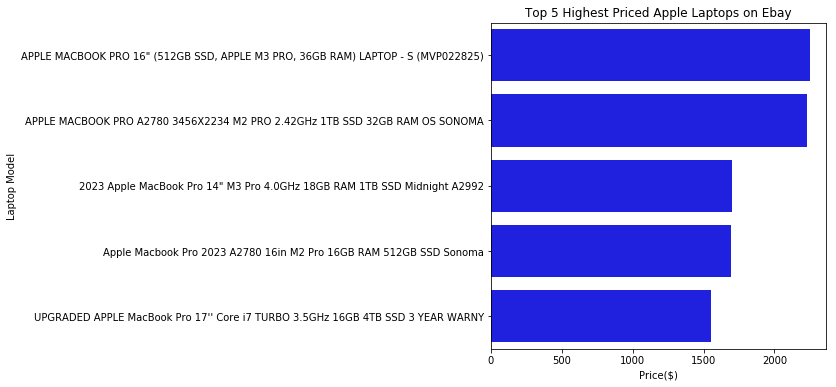

In [26]:
# Bar plot

# Create a figure size
plt.figure(figsize=(6,6))


# Create the bar plot
sns.barplot(data=apple_laptops, x="price", y="model", color = 'blue')

# Add title and labels
plt.title('Top 5 Highest Priced Apple Laptops on Ebay')
plt.xlabel('Price($)')
plt.ylabel('Laptop Model')

# Save plot to a file
plt.savefig('top_5_apple_laptops.png', bbox_inches='tight')

# Show plot
plt.show()

> From the plot above, **Apple Macbook Pro 16 (512GB SSD, APPLE M3 PRO, 36GB RAM)** is currently sold at $2249.99 (with free shipping) on **eBay** which makes it the highest among other Apple laptops.

**Note:** The data insights might differ from the current highest Apple laptops due to the project's limited number of scrape pages and price changes over time.

#### Dell Brand

In [27]:
# Filter for Dell laptops 
dell_laptops = cleaned_laptops_copy[cleaned_laptops_copy['brand'] == 'Dell']

# Sort by price to get the top 5 highest prices
dell_laptops = dell_laptops.sort_values(by='price', ascending=False).head(5)
dell_laptops

,model,price,shipping_cost,timestamp,brand
820,"New ListingNew Dell Latitude 5440 14"" (512GB SSD, Intel Core i7 13th Gen, 16GB) 8 Units",5600.00,+$70.00 shipping,2024-07-24 11:12:28.949411,Dell
1035,"Dell Precision 7680 i9-13950HX 64GB 1TB SSD 16"" FHD RTX A4000 W11P (OPEN-BOX)",2499.99,Free shipping,2024-07-24 11:13:02.177576,Dell
1292,Dell Precision 7780 Laptop i7-13850HX 1TB PCIe 64GB FHD BT RTX 3500 W11H WTY,2099.99,Free shipping,2024-07-24 11:13:21.304288,Dell
1227,"Lot of 10 Dell Latitude 5490 14” Laptops i5-8350U, 16GB, 256GB SSD",1999.95,Free shipping,2024-07-24 11:13:21.162635,Dell
1215,"Dell Precision 7680 i7-13850HX 32GB 512GB SSD 16"" FHD RTX 2000 W11P (OPEN-BOX)",1899.99,Free shipping,2024-07-24 11:13:21.127123,Dell


#### Visualization

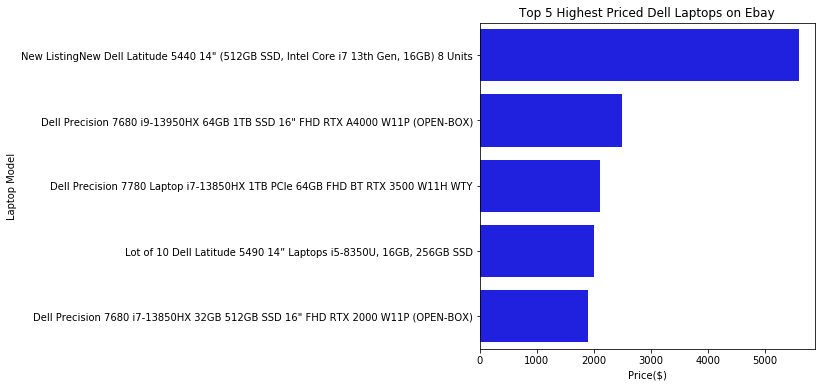

In [28]:
# Bar plot

# Create a figure size
plt.figure(figsize=(6,6))


# Create the bar plot
sns.barplot(data=dell_laptops, x="price", y="model", color = 'blue')

# Add title and labels
plt.title('Top 5 Highest Priced Dell Laptops on Ebay')
plt.xlabel('Price($)')
plt.ylabel('Laptop Model')


# Save plot to a file
plt.savefig('top_5_dell_laptops.png', bbox_inches='tight')

# Show plot
plt.show()

> From the data, **Dell Latitude e5440 14" (512GB SSD, Intel Core i7 13th Gen, 16GB)** is currently sold at $5600.00 (with +70.00 shipping) on **eBay** which makes it the highest among other Dell laptops.

#### HP Brand

In [29]:
# Filter for HP laptops 
hp_laptops = cleaned_laptops_copy[cleaned_laptops_copy['brand'] == 'HP']

# Sort by price to get the top 5 highest prices
hp_laptops = hp_laptops.sort_values(by='price', ascending=False).head(5)
hp_laptops

,model,price,shipping_cost,timestamp,brand
1543,New ListingLOT of (100) HP 840 G6 Laptops 1.60GHz CORE i5 8365U 8GB 256GB SSD W11PRO Webcam,5100.00,Freight,2024-07-24 10:57:03.449803,HP
1402,"HP - Envy 16"" Wide Ultra XGA Touch-Screen Laptop - Intel Core i7 - 16GB Memor...",1499.99,Free shipping,2024-07-24 10:56:53.886519,HP
1653,LOT of 13! HP 650 G2 ProBook Laptop 960GB NVMe SSD 16GB RAM Intel i3 2.3GHz 15.6,1450.00,+$74.41 shipping,2024-07-24 10:57:22.748566,HP
1456,"HP - Envy 17.3"" Full HD Touch-Screen Laptop - Intel Core Ultra 7 - 16GB Memor...",1349.99,Free shipping,2024-07-24 10:56:54.033270,HP
2122,New ListingHP ENVY 17t-CG000 3.9GHz i7~32GB RAM~4TB SSD+HDD~MX330~TOUCH~DVD~W11P~OFFICE PRO,1104.96,+$29.02 shipping,2024-07-24 10:58:00.353050,HP


#### Visualization

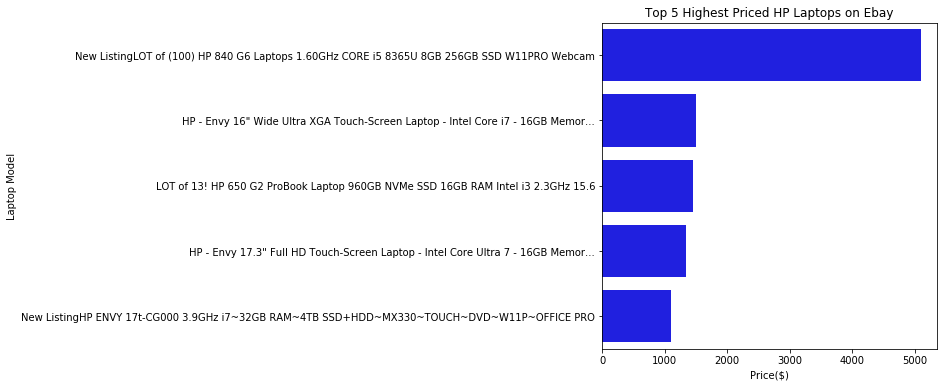

In [30]:
# Bar plot

# Create a figure size
plt.figure(figsize=(6,6))


# Create the bar plot
sns.barplot(data=hp_laptops, x="price", y="model", color = 'blue')

# Add title and labels
plt.title('Top 5 Highest Priced HP Laptops on Ebay')
plt.xlabel('Price($)')
plt.ylabel('Laptop Model')


# Save plot to a file
plt.savefig('top_5_hp_laptops.png', bbox_inches='tight')

# Show plot
plt.show()

> From the data, **HP 840 G6 Laptops 1.60GHz CORE i5 8365U 8GB 256GB SSD W11PRO Webcam** is currently sold at $5100.00 on **eBay** which makes it the highest among other HP laptops.

**Filter for free shipping laptop products**

In [31]:
cleaned_laptops_copy[cleaned_laptops_copy['shipping_cost'] == 'Free shipping']

,model,price,shipping_cost,timestamp,brand
0,"New ListingREAD! 2019 Apple MacBook Pro 16"" i7 2.6GHz 16GB 512GB SSD A2141 FIND MY ENABLED",275.00,Free shipping,2024-07-24 10:59:43.277459,Apple
1,Apple MacBook Pro 13'' MF839LL/A A1502 CORE I5-5257U 2.70GHz 8GB RAM 256GB SSD,62.00,Free shipping,2024-07-24 10:59:43.290218,Apple
2,Apple MacBook Air 13 Intel Core i7-5650U 2.20GHz 8GB RAM 256GB SSD Z0UU1LL/A,34.00,Free shipping,2024-07-24 10:59:43.291976,Apple
3,Apple MacBook Pro 13 Intel Core i5-7360U 2.30GHz 16GB RAM 256GB SSD MPXQ2LL/A,61.00,Free shipping,2024-07-24 10:59:43.295445,Apple
4,Apple MacBook Pro 13 Intel Core i7-1068NG7 2.30GHz 16GB RAM 1TB MWP72LL/A A2251,199.50,Free shipping,2024-07-24 10:59:43.297215,Apple
5,Apple MacBook Pro 15 Intel Core i9-9880H 2.30GHz 16GB RAM 512GB SSD A1990,202.50,Free shipping,2024-07-24 10:59:43.301482,Apple
6,"Apple MacBook Air 13"" Core i5 1.7GHz 4GB Ram 64GB SSD -C Grade - See Description",76.13,Free shipping,2024-07-24 10:59:43.303270,Apple
8,New ListingApple MacBook Air 13 Intel Core i5-8210Y 1.60GHz 16GB RAM 256GB SSD MVFH2LL/A,5.50,Free shipping,2024-07-24 10:59:43.307752,Apple
9,"Apple MacBook Air - 13"" Retina (TRUE TONE) - 1.6GHz - 8GB RAM - 256GB SSD",337.99,Free shipping,2024-07-24 10:59:43.309537,Apple
11,"Apple MacBook Air 13"" 256GB SSD M1 8GB Laptop CYCLECOUNT 1 PRISTINE +New Charger",202.50,Free shipping,2024-07-24 10:59:43.315450,Apple


#### Data Insights

- Most laptop prices fall within the range of $0 - 1000.


- **"Apple"** Brand has the highest average price for a laptop indicating high cost compared to other brands.


- **Apple Macbook Pro 16 (512GB SSD, APPLE M3 PRO, 36GB RAM)** is currently sold at $2249.99 (with free shipping) on **eBay** which makes it the highest among other Apple laptops.


- **Dell Latitude e5440 14" (512GB SSD, Intel Core i7 13th Gen, 16GB)** is currently sold at $5600.00 (with +70.00 shipping) on **eBay** which makes it the highest among other Dell laptops.


- **HP 840 G6 Laptops 1.60GHz CORE i5 8365U 8GB 256GB SSD W11PRO Webcam** is currently sold at $5100.00 on **eBay** which makes it the highest among other HP laptops.


- For each brand of laptop, the price increases as the laptop version increases. 


<a id="conclusions"></a>
## Conclusions
> From the project, I was able to scrape the data based on three laptop brands(Apple, Dell and HP) on eBay website, perform data wrangling(gather, assess and cleaning) and exploratory analysis to identify trends and patterns in prices across different laptop brands.

> Further analysis can be done on this project; price trends over time, comparing the prices across different specifications (RAM, Storage etc.) and price correlation analysis.

**Limitation**
- Number of scrape pages: The project is limited to a certain number of pages from the eBay website which may be insufficient for further analysis or statistical analysis.
- Product released date/year: It will be difficult to analyze the price trends over time without the released date to get full insights on the price changes.
